# Case Study #3 - Correlation and Regression

**A textile company regularly spent money on five advertising companies for their
ads.**

In [1]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the csv file into a pandas dataframe.
df = pd.read_csv('Add_sales_data_2018.csv')
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


As you can see that the features are not in the understandable name except Date feautre. So we can rename the columns.

In [3]:
#rename the columns for better understand the data with less variable names
data = df.rename(columns = {'Add1(in Thousands)':'Ads1', 'Add2(in Thousands)':'Ads2',
                       'Add3(in Thousands)':'Ads3', 'Add4(in Thousands)':'Ads4', 
                       'Add5(in Thousands)':'Ads5','Profit(in Thousands)':'Profit'})
# Display the data with default 5 rows in the data
data.head()

,Date,Ads1,Ads2,Ads3,Ads4,Ads5,Profit
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
# summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    205 non-null    object 
 1   Ads1    205 non-null    float64
 2   Ads2    205 non-null    float64
 3   Ads3    205 non-null    float64
 4   Ads4    205 non-null    float64
 5   Ads5    205 non-null    float64
 6   Profit  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


This dataset contains the following data:

there is 205 rows and 7 features. this dataset has Date, Ads1, Ads2, Ads3, Ads4, Ads5 and Profit features.

In [5]:
# Calculating the null values present in each columns in the dataset
data.isna().sum() # or you can use df.isnull().sum() as well

Date      0
Ads1      0
Ads2      0
Ads3      0
Ads4      0
Ads5      0
Profit    0
dtype: int64

As you can see that, there is no missing values present in the dataset. Before moving into the questions we can just plot the data visualization.

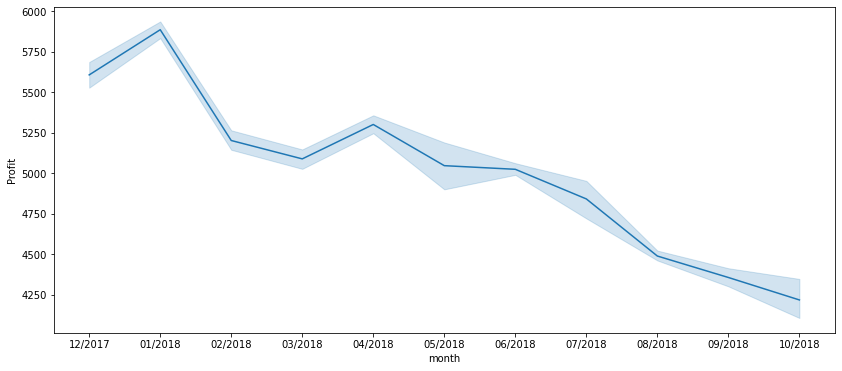

In [6]:
# data visualization
temp_data = data.copy() # new temporary dataframe for copy of the original dataset
temp_data['month'] = pd.to_datetime(temp_data.Date).dt.strftime('%m/%Y') # creating month column from Date feature
plt.figure(figsize=(14,6)) 
ax = sns.lineplot(x = 'month', y = 'Profit', data = temp_data)
ax.invert_xaxis() # invert the x-axis

As you can see that the profit seems to be decreasing in 2018 upto october dispite amount being spent for advertising

### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [7]:
# statistical summary of the data
data.describe().T# or data.describe().transpose() , diagonal by writing rows as columns 

,count,mean,std,min,25%,50%,75%,max
Ads1,205.0,267.577561,26.219588,208.000,244.000,269.700,284.400,327.70
Ads2,205.0,271.722439,25.914939,218.600,248.500,274.200,288.800,328.75
Ads3,205.0,262.990732,26.126704,205.900,240.300,263.250,280.900,321.65
Ads4,205.0,267.223902,26.238832,210.250,243.050,268.900,284.500,325.95
Ads5,205.0,267.152683,26.215360,209.200,243.000,268.350,284.450,325.75
Profit,205.0,5059.630234,486.910414,4042.448,4617.695,5088.455,5387.438,6137.80


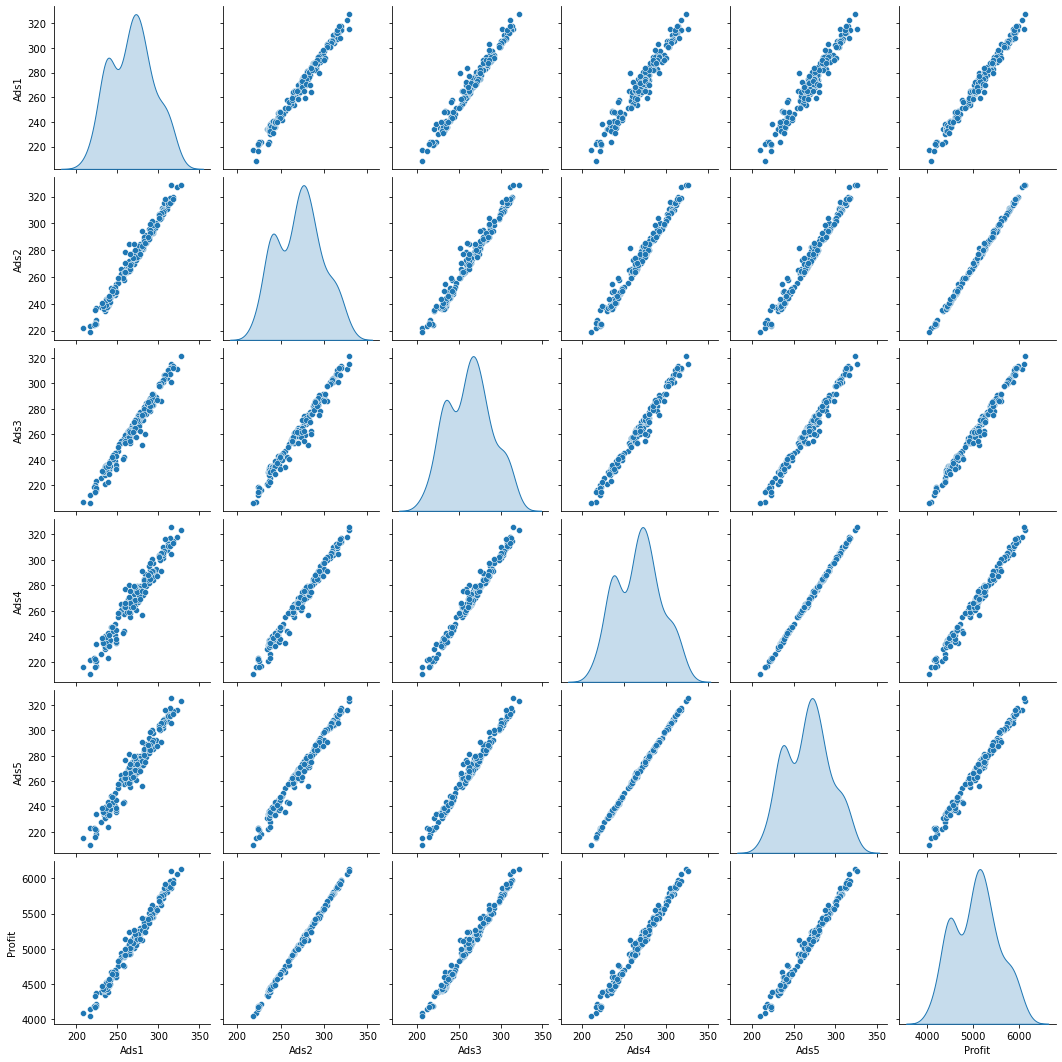

In [8]:
# data visualization of numerical data
sns.pairplot(data=data, diag_kind='kde')
plt.show()

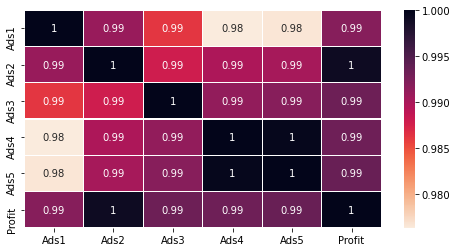

In [9]:
# correlation matrix with heatmap
plt.subplots(figsize=(8,4))
sns.heatmap(data=data.corr(), annot=True, linewidths=0.2,cmap='rocket_r')
plt.show()

From the above pairplot and heatmap we can say that
- There is a strong linear relationship between the amount spent for advertising through five different companies and profit generated
- Also there is a high positive correlation between  second advertising company (ads2) and Profit. So this will need for our model prediction.
- Finally we can say that amount spent for ads4 and ads5 are strongly correlated either ads4 and ads5 can be droped from model or 2 different models can be created.

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [10]:
# Import the required libraries for STATMODELS and SCIKIT-LEARN
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
# new dataframe with 5 advetising companies and profit features
data1 = data.loc[:,'Ads1':]
data1.head()

,Ads1,Ads2,Ads3,Ads4,Ads5,Profit
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683


In [12]:
# Model considering only first 4 advetising companies
# create X and y
X = data1.drop(columns=['Ads5', 'Profit'], axis=1)
y = data1['Profit']

In [13]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=65, test_size=90)
data_compare = pd.DataFrame({'Test Profits':y_test})

In [14]:
# Initiate and fit
lr = LinearRegression()
model = lr.fit(X_train, y_train)

# print the coefficients
print(f'Model slopes are {model.coef_} and model intercept is {model.intercept_}')

Model slopes are [ 0.92922986 12.48056356  3.58403877  1.78688168] and model intercept is -0.33885993770127243


In [15]:
# predicting the observation
test_pred = model.predict(X_test) 

# Predicted observation is stored in Predicted Profits column
data_compare['Predicted Profits'] = test_pred 

In [16]:
# calculate MSE
print(f'MSE for the model is {mean_squared_error(y_test, test_pred)}')

MSE for the model is 0.36492680069174965


In [17]:
# Display the predicted and test profit for comparison
data_compare.head()

,Test Profits,Predicted Profits
88,4937.030,4937.768512
56,4947.720,4947.237544
31,4617.695,4617.263795
66,5038.222,5037.949605
12,4464.110,4464.383445


In conclusion, the MSE is very low in this case so which clearly says the data points are very close to the best fit line and there follows strong linear relationship between predictor and feature space variables.

In addition from the above results predicted by model it is truely beleives that the model will perform as expected when deployed to production and will be able to predit profits from specified advertising spents.

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

- 'Add1(in Thousands)':290, 
- 'Add2(in Thousands)':312, 
- 'Add3(in Thousands)':309, 
- 'Add4(in Thousands)':298, 
- 'Add5(in Thousands)':320

In [18]:
# predict the profit from test
profit_pred = pd.DataFrame(columns= X_test.columns)

# assign the given sales
given_sales = [290,312,309,298]

#assign 0th index label to given sales values
profit_pred.loc[0] = given_sales
profit_pred

,Ads1,Ads2,Ads3,Ads4
0,290,312,309,298


In [19]:
print(f'The predicted profit generated by the company, if they wish to spend the {model.predict(profit_pred)} amount for advertisement')

The predicted profit generated by the company, if they wish to spend the [5803.03235232] amount for advertisement
